## TF-IDF

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



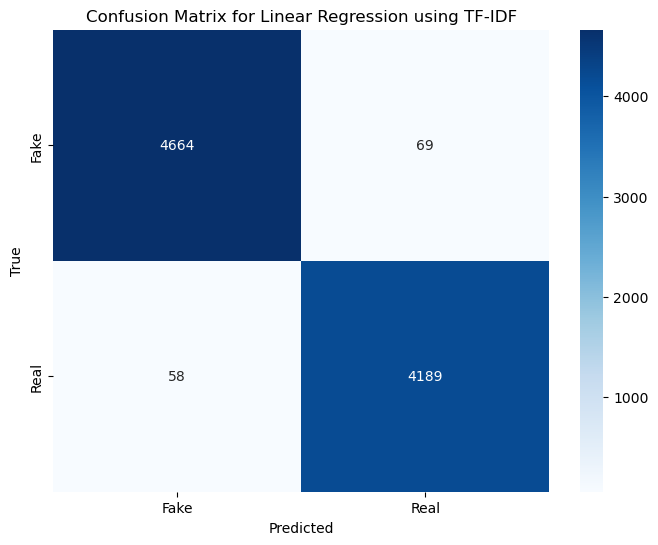

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# prepare df: combine fake and real articles
df_fake = pd.read_csv('data/Fake.csv')
df_real = pd.read_csv('data/True.csv')
df_fake['label'] = 0
df_real['label'] = 1
df = pd.concat([df_fake, df_real], ignore_index=True)

#use 'text' column if available; otherwise use 'title'
text_column = 'text' if 'text' in df.columns else 'title'

# TF-IDF Vectorization
# max df removes terms that appear to frequently 
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)

#train a classifier; log reg
X = vectorizer.fit_transform(df[text_column])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# test 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Linear Regression using TF-IDF')
plt.show()



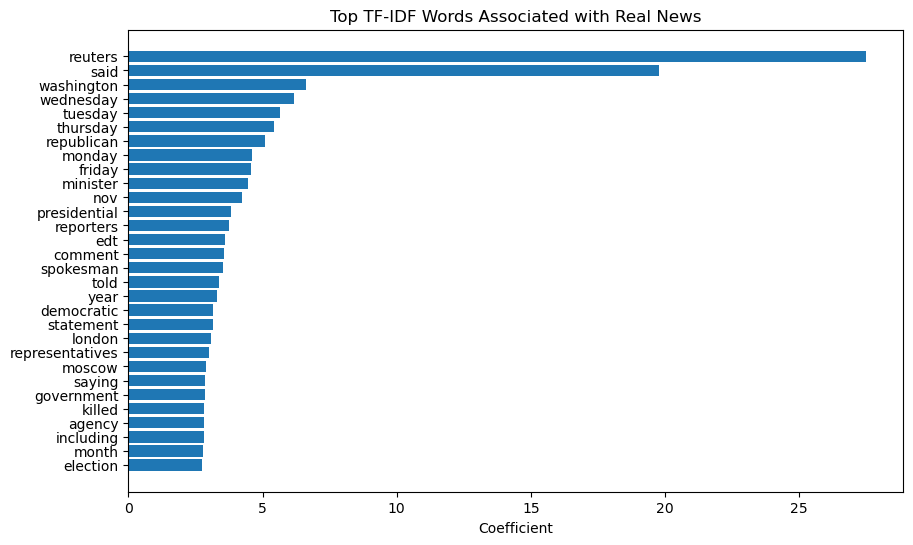

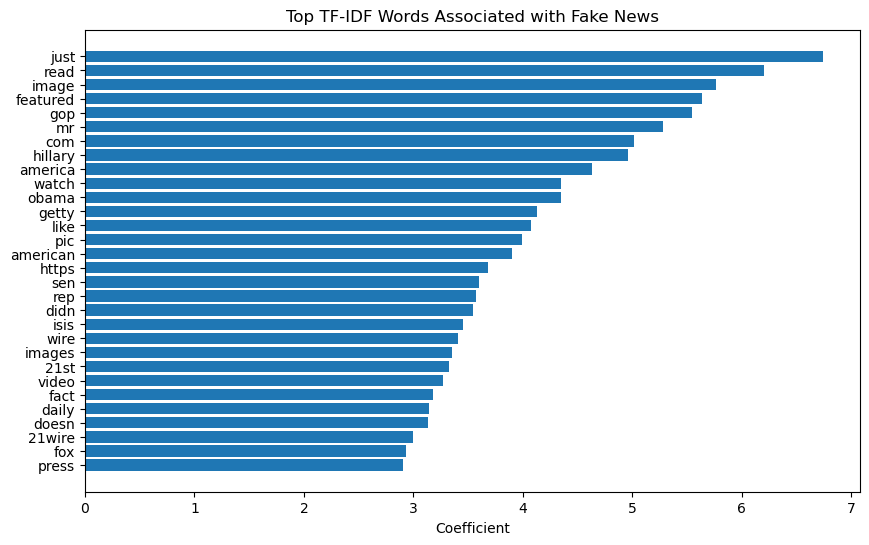

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


#feature extraction
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
coef_df = pd.DataFrame({
    'term': feature_names,
    'coefficient': coefficients
})

#top 30 most real/fake news
top_real = coef_df.sort_values(by='coefficient', ascending=False).head(30)
top_fake = coef_df.sort_values(by='coefficient').head(30)

#real news
plt.figure(figsize=(10,6))
plt.barh(top_real['term'], top_real['coefficient'])
plt.title('Top TF-IDF Words Associated with Real News')
plt.xlabel('Coefficient')
plt.gca().invert_yaxis()
plt.show()

#fake news
plt.figure(figsize=(10,6))
plt.barh(top_fake['term'], -top_fake['coefficient'])  
plt.title('Top TF-IDF Words Associated with Fake News')
plt.xlabel('Coefficient')
plt.gca().invert_yaxis()
plt.show()
